# Apprentissage non  supervisé

Ce domaine (unsupervised learning, clustering) regroupe un ensemble varié de techniques qui visent à trouver des sous-ensembles cohérents des données. Beaucoup d'approches existent selon les représentations considérées (similarité de données, représentation vectorielle, graphes), deux formulations principales sont généralement considérées étant un ensemble de données $D$ :

- Clustering hard  : on cherche une partition de $D$ en $k$ parties, deux à deux disjointes, qui minimise une certaine fonction de coût.
- Clustering soft : à chaque exemple on associe une probabilité d'appartenance à chaque cluster.


# Apprentissage de prototype : Algorithme $k$-means

Un type d'approche pour le clustering est géométrique : il s'agit de trouver une partition de l'espace d'entrée en considérant la densité d'exemples pour caractériser ces partitions. Un exemple de tel algorithme est $k$-means : cet algorithme considère pour chaque cluster $C_i$ un prototype $\mu_i \in \mathbb{R}^d$ dans l'espace d'entrée. Chaque exemple $x$ est affecté au cluster le plus proche au sens de la distance euclidienne à son prototype. Soit $s_C : \mathbb{R^d}\to \mathbb{N}$ la fonction d'affectation associé au clustering $$C=\{C_1,C_2,\ldots,C_k\}~: ~s_C(x)=argmin_i \|\mu_i-x\|^2$$.

La fonction de coût sur un ensemble de données $D=\{x_1,\ldots,x_n\}$ généralement considérée dans ce cadre est la moyenne des distances intra-clusters : $\frac{1}{n}\sum_{i=1}^n \sum_{j|s_C(x_j)=i}\|\mu_i-x_j\|^2=\frac{1}{n}\sum_{i=1}^n\|\mu_{s_C(x_i)}-x_i\|^2$. 

C'est également ce qu'on appelle le coût de reconstruction : effectivement, dans le cadre de cette approche, chaque donnée d'entrée peut être "représentée" par le prototype associé : on réalise ainsi une compression de l'information (n.b. : beaucoup de liens existent entre l'apprentissage et la théorie de l'information, la compression et le traitement de signal). L'algorithme fonctionne en deux étapes, (la généralisation de cet algorithme est appelée algorithme E-M, Expectation-Maximization) :

- à partir d'un clustering $C^t$, les prototypes $\mu_i^t=\frac{1}{|C_i|}\sum_{x_j\in C_i^t}x_j$, barycentres des exemples affectés à ce cluster;

- à partir de ces nouveaux barycentres, calculer la nouvelle affectation de chaque exemple (le prototype le plus proche). Si un cluster se retrouve sans aucun exemple, il est ré-initialisé au hasard, par exemple en tirant un exemple de la base d'apprentissage au hasard.

Ces deux étapes sont alternées jusqu'à stabilisation. L'initialisation est aléatoire : soit les centres sont tirés au hasard, soit les affectations.

Cet algorithme peut être entre autre utilisé pour faire de la compression d'image (connu également sous le nom de quantification vectorielle). Une couleur est codée par un triplet $(r,g,b)$ dénotant le mélange de composantes rouge, vert et bleu. En limitant le nombre de couleurs possibles dans l'image (ces couleurs forment ce  qu'on appelle un dictionnaire), on réalise une grosse compression. L'objectif est de trouver quelles couleurs doivent être présentent dans notre dictionnaire afin de minimiser l'erreur entre l'image compressé et l'image original (remarque : c'est exactement l'erreur de reconstruction ci-dessus).

En considérant l'ensemble des pixels de l'image comme la base d'exemples non supervisée, le nouveau codage de chaque pixel peut être obtenu par le résultat de l'algorithme $k$-means sur cette base d'exemples.

Le code suivant contient un squelette de l'algorithme k-mean. La fonction **predict(data)** permet de prédire le cluster de chaque donnée d'entrée; la fonction **fit(data)** permet d'apprendre les clusters en alternant les deux étapes de l'algorithme; la fonction **transform(data)** permet de récupérer chaque donnée remplacée par son centre et la fonction **erreur(data)** de calculer l'erreur de reconstructions. Compléter le code : vous pourrez en particulier utiliser les fonctions **numpy.linalg.norm** et **numpy.random.randint**.

Les instructions qui suivent permettent de lire, afficher, modifier, sauver une image au format **png** et de la stocker dans un tableau de taille $l\times h\times c$, $l$ la largeur de l'image, $h$ la hauteur, et $c=3$ généralement pour les 3 couleurs (parfois 4, la 4eme dimension étant pour la transparence; dans la suite nous ignorons cette composante). 

En codant vous même l'algorithme ou en utilisant la version de sklearn, expérimentez la compression : choisir une image, construire avec $k$-means l'image compressée et afficher la. Etudier en fonction du nombre de clusters (couleurs) choisis comment évolue l'erreur de reconstruction.

Quel est le gain en compresssion effectué ? 
Sachant que souvent une image peut être découpée en région de tonalité homogène,  voyez-vous une amélioration possible pour augmenter la compression tout en diminuant l'erreur de compression ?




In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import scipy.misc

class KMeans(object):
    """ parametres : 
        * k : nombre de clusters
        * maxiter : nombre d'iterations
    """
    def __init__(self,k=4,maxiter=5):
        self.k, self.maxiter, self.centres = k, maxiter, None
        self.clust = None
        self.err = []

    #   Apprentissage des clusters
    def fit(self,data):
        N = data.shape[0] # nombre d'exemples
        d = data.shape[1] # dimension
        self.centres = np.zeros((self.k,d)) # centres de chaque cluster, un par ligne
        self.clust = np.random.randint(0,self.k,N) # affectation de chaque exemple au cluster correspondant 
        for t in range(self.maxiter):
            print("%d/%d : %f" %(t, self.maxiter, self.error(data)))
            for i in range(self.k):
                if len(self.clust[self.clust == i]) != 0:
                    self.centres[i] = np.mean(data[self.clust==i], axis=0)
                else:
                    self.centres[i] = data[np.random.randint(0,N)]
                #print(self.centres[i])
            self.clust = self.predict(data)
        return self.clust
    # Prediction du numero de cluster
    def predict(self,data):
        for i in range(data.shape[0]):
            self.clust[i] = np.argmin(np.linalg.norm(self.centres - data[i], axis=1))
        return self.clust
    # transforme chaque exemple en son prototype
    def transform(self,data):
        data2 = np.copy(data)
        for k in range(data.shape[0]):
            data2[k] = self.centres[self.clust[k]]
        return data2    # Erreur de reconstruction moyenne
    
    def error(self,data):
        err = np.mean(np.linalg.norm(self.transform(data) - data))
        self.err.append(err)
        return err


0/5 : 1646.820679
1/5 : 1191.880981
2/5 : 197.162125
3/5 : 151.942017
4/5 : 151.934967


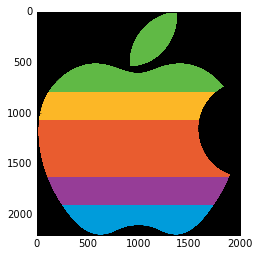

In [2]:
#### KMeans et image

im=plt.imread("img.png")[:,:,:3] #on garde que les 3 premieres composantes, la transparence est inutile
im_h,im_l,_=im.shape
data=im.reshape((im_h*im_l,3)) #transformation en matrice n*3, n nombre de pixels

km = KMeans(k=7,maxiter=5)
km.fit(data)
imnew=km.transform(data).reshape((im_h,im_l,3)) #transformation inverse
plt.imshow(imnew) #afficher l'image


3 clusters
0/10 : 490.854126
1/10 : 159.764282
2/10 : 93.729614
3/10 : 89.880226
4/10 : 77.763969
5/10 : 72.830849
6/10 : 72.388130
7/10 : 72.297264
8/10 : 72.252792
9/10 : 72.223961
8 clusters
0/10 : 490.854126
1/10 : 159.119324
2/10 : 68.145439
3/10 : 57.076916
4/10 : 51.596302
5/10 : 46.018833
6/10 : 43.073242
7/10 : 42.024078
8/10 : 41.644531
9/10 : 41.438931
15 clusters
0/10 : 490.854126
1/10 : 158.536697
2/10 : 50.126102
3/10 : 37.688850
4/10 : 35.875423
5/10 : 34.206482
6/10 : 32.649788
7/10 : 31.882797
8/10 : 31.508236
9/10 : 31.290264


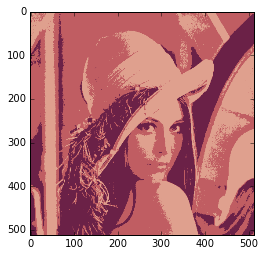

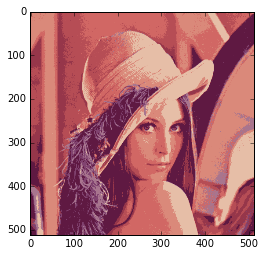

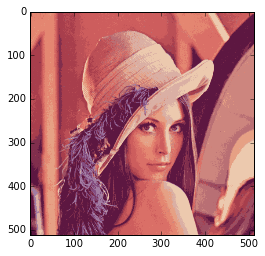

In [3]:
plt.figure(1)
plt.clf()
im=plt.imread("lena.png")[:,:,:3] #on garde que les 3 premieres composantes, la transparence est inutile
im_h,im_l,_=im.shape
data=im.reshape((im_h*im_l,3)) #transformation en matrice n*3, n nombre de pixels
print("3 clusters")
km = KMeans(k=3,maxiter=10)
km.fit(data)
imnew=km.transform(data).reshape((im_h,im_l,3)) #transformation inverse
plt.imshow(imnew) #afficher l'image
scipy.misc.imsave('lena3.png', imnew)

plt.figure(2)
plt.clf()
im=plt.imread("lena.png")[:,:,:3] #on garde que les 3 premieres composantes, la transparence est inutile
im_h,im_l,_=im.shape
data=im.reshape((im_h*im_l,3)) #transformation en matrice n*3, n nombre de pixels
print("8 clusters")
km8 = KMeans(k=8,maxiter=10)
km8.fit(data)
imnew=km8.transform(data).reshape((im_h,im_l,3)) #transformation inverse
plt.imshow(imnew) #afficher l'image
scipy.misc.imsave('lena8.png', imnew)

plt.figure(3)
plt.clf()
im=plt.imread("lena.png")[:,:,:3] #on garde que les 3 premieres composantes, la transparence est inutile
im_h,im_l,_=im.shape
data=im.reshape((im_h*im_l,3)) #transformation en matrice n*3, n nombre de pixels
print("15 clusters")
km15 = KMeans(k=15,maxiter=10)
km15.fit(data)
imnew=km15.transform(data).reshape((im_h,im_l,3)) #transformation inverse
plt.imshow(imnew) #afficher l'image
scipy.misc.imsave('lena15.png', imnew)

plt.show()


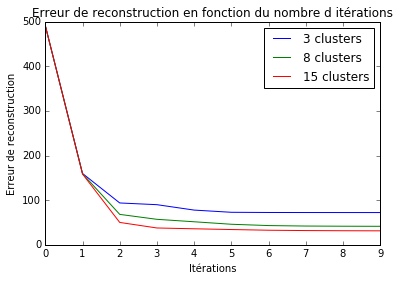

In [4]:
plt.figure(4)
plt.clf()
plt.plot(list(range(10)),km.err, label="3 clusters")
plt.plot(list(range(10)),km8.err, label="8 clusters")
plt.plot(list(range(10)),km15.err, label="15 clusters")
plt.title('Erreur de reconstruction en fonction du nombre d itérations')
plt.xlabel('Itérations')
plt.ylabel('Erreur de reconstruction')
plt.legend()

On en déduit que l'erreur de reconstruction diminue avec un nombre de cluster croissant.

## Gain de compression

L'image n'est composée que d'un nombre fini (nombre de clusters) de couleur tandis que l'image initiale contient des dizaines de milliers de couleurs. Chaque couleur est stockée en bits. 
En enregistrant l'image, on compare la compression: avec 15 clusters, on passe de 474KB à 64KB. On a donc un taux de compression de 86%. Le taux de compression diminue avec un nombre de cluster croissant.

# Utilisation de Sklearn

Nous utilisons le code de Scikit-learn du tutoriel en ligne.

Fitting model on a small sub-sample of the data
done in 0.179s.
Predicting color indices on the full image (k-means)
done in 0.146s.
Predicting color indices on the full image (random)
done in 0.143s.


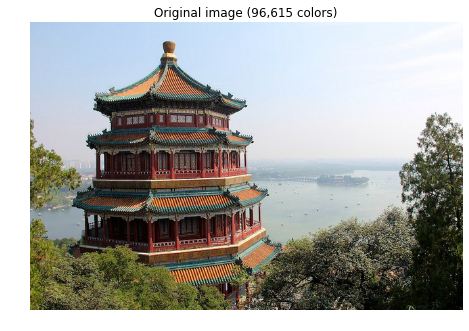

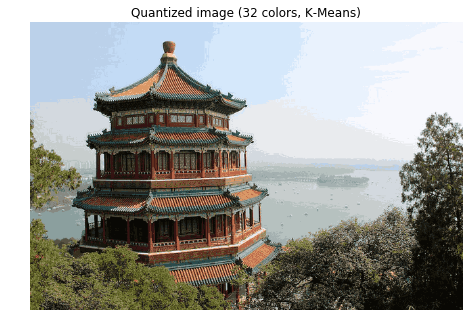

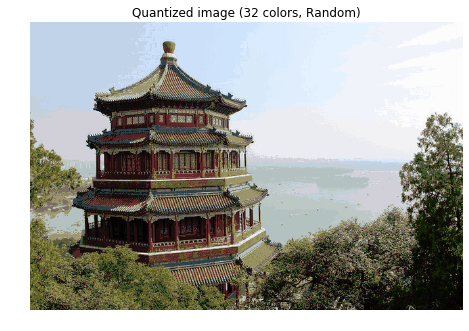

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 32

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1]
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (32 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (32 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()
